# Section E. Machine Learning in Python Intermedia

# Part I. Logistic Regression

In [3]:
# 2. Introduction to Data
import pandas as pd
admissions = pd.read_csv('admissions.csv')

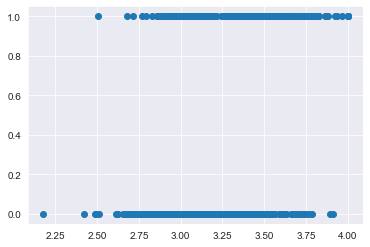

In [4]:
import matplotlib.pyplot as plt

plt.scatter(admissions['gpa'],admissions['admit'])
plt.show()

In [5]:
# Part 4. Logistic Function
import numpy as np

def logistic(x):
    return (np.exp(x)/ (1+np.exp(x)))

logistic(3)

0.9525741268224333

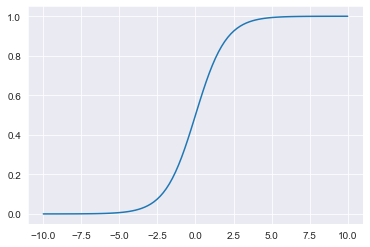

In [10]:
x= np.linspace(-10,10,100)

y = logistic(x)
plt.plot(x,y)
plt.show()

In [ ]:
plt.scatter(range(0,10),admissions['admit'])
plt.show()

In [12]:
# 5. Training the Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

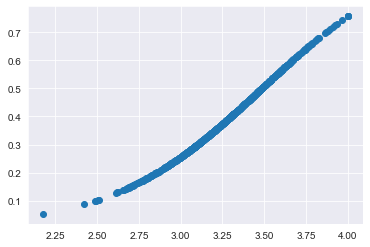

In [17]:
# 6. Plotting the Probability

pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
plt.scatter(admissions["gpa"], pred_probs[:,1])

plt.show()

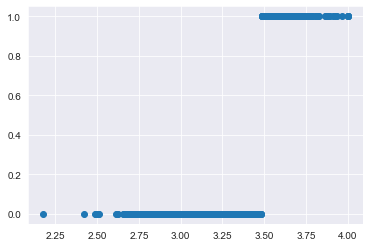

In [18]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
fitted_labels = logistic_model.predict(admissions [["gpa"]]) #prediction
plt.scatter(admissions["gpa"], fitted_labels)

# Part II. Intruction to evaluting binary classifier

In [20]:
#. 1. introduciton to the data

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

admissions = pd.read_csv("admissions.csv")
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])
admissions = pd.read_csv("admissions.csv")
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])

labels = model.predict(admissions[["gpa"]])
admissions["predicted_label"] = labels
print(admissions["predicted_label"].value_counts())
admissions.head()


predicted_label
0    507
1    137
Name: count, dtype: int64


,admit,gpa,gre,predicted_label
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0


In [21]:
admissions["actual_label"] = admissions["admit"]
matches = admissions["predicted_label"] == admissions["actual_label"]
correct_predictions = admissions[matches]
print(correct_predictions.head())
accuracy = len(correct_predictions) / len(admissions)
print(accuracy)


   admit       gpa         gre  predicted_label  actual_label
0      0  3.177277  594.102992                0             0
1      0  3.412655  631.528607                0             0
2      0  2.728097  553.714399                0             0
3      0  3.093559  551.089985                0             0
4      0  3.141923  537.184894                0             0
0.6847826086956522


In [22]:
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])

print(true_positives)
print(true_negatives)

89
352


In [23]:
# From the previous screen 
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])
false_negative_filter = (admissions["predicted_label"] == 0) &(admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])
sensitivity = true_positives / (true_positives + false_negatives)
print(sensitivity)

0.36475409836065575


In [2]:
true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])
false_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)
false_positives = len(admissions[false_positive_filter])
specificity = (true_negatives) / (false_positives + true_negatives)
print(specificity)


NameError: name 'admissions' is not defined

# Part III: Multiclass Classfication

In [1]:
import pandas as pd
cars = pd.read_csv("auto-mpg.csv")
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
unique_regions = cars['origin'].unique()

In [4]:
unique_regions

array([1, 3, 2])

In [5]:
# dummy variables

dummy_df = pd.get_dummies(cars['cylinders'], prefix = 'cyl')

In [8]:
cars['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [6]:
dummy_df

,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True
...,...,...,...,...,...
393,False,True,False,False,False
394,False,True,False,False,False
395,False,True,False,False,False
396,False,True,False,False,False


In [11]:
dummy_years = pd.get_dummies(cars['model year'], prefix='year')
dummy_years.head()

,year_70,year_71,year_72,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
cars = pd.concat([cars,dummy_years], axis = 1)

In [13]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,year_70,...,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,True,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,True,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,True,...,False,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,True,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,False,...,False,False,False,False,False,False,False,False,False,True
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,False,...,False,False,False,False,False,False,False,False,False,True
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,False,...,False,False,False,False,False,False,False,False,False,True
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,False,...,False,False,False,False,False,False,False,False,False,True


In [16]:
cars.drop(['model year','cylinders'],axis =1, inplace=True)

In [17]:

cars

,mpg,displacement,horsepower,weight,acceleration,origin,car name,year_70,year_71,year_72,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,18.0,307.0,130,3504,12.0,1,chevrolet chevelle malibu,True,False,False,False,False,False,False,False,False,False,False,False,False
1,15.0,350.0,165,3693,11.5,1,buick skylark 320,True,False,False,False,False,False,False,False,False,False,False,False,False
2,18.0,318.0,150,3436,11.0,1,plymouth satellite,True,False,False,False,False,False,False,False,False,False,False,False,False
3,16.0,304.0,150,3433,12.0,1,amc rebel sst,True,False,False,False,False,False,False,False,False,False,False,False,False
4,17.0,302.0,140,3449,10.5,1,ford torino,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86,2790,15.6,1,ford mustang gl,False,False,False,False,False,False,False,False,False,False,False,False,True
394,44.0,97.0,52,2130,24.6,2,vw pickup,False,False,False,False,False,False,False,False,False,False,False,False,True
395,32.0,135.0,84,2295,11.6,1,dodge rampage,False,False,False,False,False,False,False,False,False,False,False,False,True
396,28.0,120.0,79,2625,18.6,1,ford ranger,False,False,False,False,False,False,False,False,False,False,False,False,True


In [20]:
import numpy as np
shuffled_rows = np. random.permutation(cars. index)
shuffled_cars = cars.iloc[shuffled_rows]
highest_train_row = int(cars.shape[0] * .70)
train = shuffled_cars.iloc[0:highest_train_row]
test = shuffled_cars.iloc[highest_train_row:]

In [28]:
cars.head()

,mpg,displacement,horsepower,weight,acceleration,origin,car name,year_70,year_71,year_72,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,18.0,307.0,130,3504,12.0,1,chevrolet chevelle malibu,True,False,False,False,False,False,False,False,False,False,False,False,False
1,15.0,350.0,165,3693,11.5,1,buick skylark 320,True,False,False,False,False,False,False,False,False,False,False,False,False
2,18.0,318.0,150,3436,11.0,1,plymouth satellite,True,False,False,False,False,False,False,False,False,False,False,False,False
3,16.0,304.0,150,3433,12.0,1,amc rebel sst,True,False,False,False,False,False,False,False,False,False,False,False,False
4,17.0,302.0,140,3449,10.5,1,ford torino,True,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
cars.origin.unique()

array([1, 3, 2])

In [22]:
from sklearn.linear_model import LogisticRegression

# There are 3 kind of origin , 1, 2,3, we will have 3 models for each
unique_origins = cars["origin"].unique()
unique_origins.sort()

models = {}
features = [c for c in train.columns if c.startswith("cyl") or c.startswith("year")]

for origin in unique_origins:
    model = LogisticRegression()

    X_train = train[features]
    y_train = train["origin"] == origin

    model.fit(X_train, y_train)
    models[origin] = model

In [29]:
models

{1: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 2: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 3: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=Fal

In [47]:
testing_probs = pd.DataFrame()

In [ ]:
for i in unique_regions:
    testing_probs[i] = models[i].predict_proba(test[features])

In [51]:
for i in unique_regions:
    probs = models[i].predict_proba(test[features])
    testing_probs[i] = probs[:,1]

In [52]:
testing_probs

,1,3,2
0,0.282210,0.376832,0.324747
1,0.668776,0.155352,0.177547
2,0.282210,0.376832,0.324747
3,0.608204,0.215233,0.173789
4,0.711807,0.133160,0.162125
...,...,...,...
115,0.583709,0.209665,0.200969
116,0.711807,0.133160,0.162125
117,0.608204,0.215233,0.173789
118,0.644865,0.250190,0.109980


In [31]:
temp =models[1].predict_proba(test[features])

In [32]:
temp

array([[0.71778955, 0.28221045],
       [0.33122448, 0.66877552],
       [0.71778955, 0.28221045],
       [0.39179599, 0.60820401],
       [0.28819327, 0.71180673],
       [0.33122448, 0.66877552],
       [0.24672138, 0.75327862],
       [0.37316525, 0.62683475],
       [0.33122448, 0.66877552],
       [0.71778955, 0.28221045],
       [0.24672138, 0.75327862],
       [0.36862221, 0.63137779],
       [0.3859867 , 0.6140133 ],
       [0.3859867 , 0.6140133 ],
       [0.3859867 , 0.6140133 ],
       [0.37316525, 0.62683475],
       [0.71778955, 0.28221045],
       [0.295896  , 0.704104  ],
       [0.36862221, 0.63137779],
       [0.3859867 , 0.6140133 ],
       [0.58989579, 0.41010421],
       [0.24672138, 0.75327862],
       [0.71778955, 0.28221045],
       [0.33122448, 0.66877552],
       [0.3859867 , 0.6140133 ],
       [0.33122448, 0.66877552],
       [0.28819327, 0.71180673],
       [0.58989579, 0.41010421],
       [0.41629083, 0.58370917],
       [0.58989579, 0.41010421],
       [0.

In [41]:
import matplotlib.pyplot as plt

plt.scatter([0,10], temp[1])

TypeError: 'type' object is not subscriptable

In [56]:
predicted_origin = testing_probs.idxmax(axis=1)

print(predicted_origin)

0      3
1      1
2      3
3      1
4      1
      ..
115    1
116    1
117    1
118    1
119    1
Length: 120, dtype: int64


In [55]:
testing_probs

,1,3,2
0,0.282210,0.376832,0.324747
1,0.668776,0.155352,0.177547
2,0.282210,0.376832,0.324747
3,0.608204,0.215233,0.173789
4,0.711807,0.133160,0.162125
...,...,...,...
115,0.583709,0.209665,0.200969
116,0.711807,0.133160,0.162125
117,0.608204,0.215233,0.173789
118,0.644865,0.250190,0.109980


# Part IV. Overfitting



In [2]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_csv("auto-mpg.csv")
filtered_cars = cars[cars['horsepower'] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

<ipython-input-2-7f9d14609c15>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')


In [3]:
filtered_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def train_and_test(cols):
    # Split into features & target.
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    # Fit model.
    lr = LinearRegression()
    lr.fit(features, target)
    # Make predictions on training set.
    predictions = lr.predict(features)
    # Compute MSE and Variance.
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    return(mse, variance)

cyl_mse, cyl_var = train_and_test(["cylinders"])
weight_mse, weight_var = train_and_test(["weight"])

In [5]:
print(f'cyl_mse, cyl_var: {cyl_mse}, {cyl_var}')
print(f'weight_mse, weight_var: {weight_mse}, {weight_var}')

cyl_mse, cyl_var: 24.020179568155537, 36.74255887416014
weight_mse, weight_var: 18.6766165974193, 42.08612184489639


In [6]:
# Our implementation for train_and_test, takes in a list of strings.
def train_and_test(cols):
    # Split into features & target.
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    # Fit model.
    lr = LinearRegression()
    lr.fit(features, target)
    # Make predictions on training set.
    predictions = lr.predict(features)
    # Compute MSE and Variance.
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    return(mse, variance)

one_mse, one_var = train_and_test(["cylinders"])
two_mse, two_var = train_and_test(["cylinders", "displacement"])
three_mse, three_var = train_and_test(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_test(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

In [7]:
print(f'one_mse, one_var:{		one_mse},{one_var}')
print(f'two_mse, two_var:{		two_mse},{two_var}')
print(f'three_mse, three_var:{		three_mse},{ three_var}')
print(f'four_mse, four_var:	{	four_mse},{ four_var}')
print(f'five_mse, five_var:	{	five_mse},{ five_var}')
print(f'six_mse, six_var:	{	six_mse},{ six_var}')
print(f'seven_mse, seven_var:{		seven_mse},{ seven_var}')

one_mse, one_var:24.020179568155537,36.74255887416014
two_mse, two_var:21.282057055586364,39.48068138672937
three_mse, three_var:20.25295483971423,40.50978360260149
four_mse, four_var:	17.763860571843846,42.998877870471816
five_mse, five_var:	17.761396105406217,43.00134233690933
six_mse, six_var:	11.590170981415225,49.17256746090037
seven_mse, seven_var:10.847480945000454,49.91525749731511


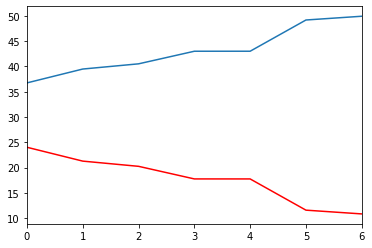

In [16]:
import matplotlib.pyplot as plt


plt.plot([one_mse,two_mse,three_mse,four_mse,five_mse,six_mse,seven_mse],c='red')
plt.plot([one_var,two_var,three_var,four_var,five_var,six_var,seven_var])
plt.xlim(0, 6)
plt.show()

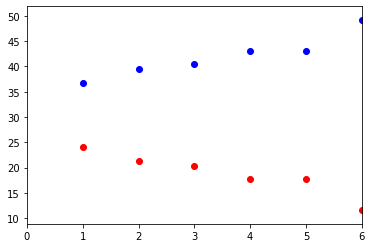

In [20]:
plt.scatter([1,2,3,4,5,6,7],[one_mse,two_mse,three_mse,four_mse,five_mse,six_mse,seven_mse],c='red')
plt.scatter([1,2,3,4,5,6,7],[one_var,two_var,three_var,four_var,five_var,six_var,seven_var], c = 'blue')
plt.xlim(0, 6)
plt.show()